In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import matplotlib.legend_handler

# File to Load (Remember to change these)
city_data_to_load = os.path.join("city_data.csv")
ride_data_to_load = os.path.join("ride_data.csv")

# Read the City and Ride Data
cityData = pd.read_csv(city_data_to_load)
rideData = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
df = rideData.merge(cityData,how="left",on="city")

# Display the data table for preview
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

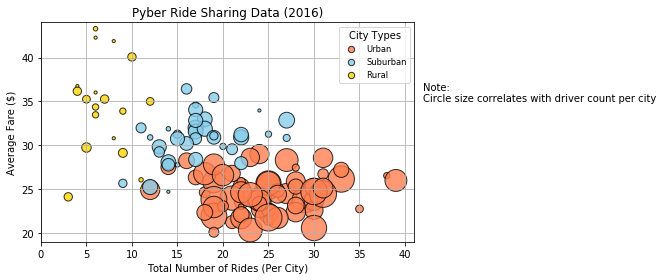

In [8]:
# Obtain the x and y coordinates for each of the three city types
#Filter data frame by type
urbanDF = df[df["type"] == "Urban"]
suburbanDF = df[df["type"]=="Suburban"]
ruralDF = df[df["type"]=="Rural"]

#group each dataframe by city
urbanGroup = urbanDF.groupby("city")
suburbanGroup = suburbanDF.groupby("city")
ruralGroup = ruralDF.groupby("city")

#get count of rides by counting ride ID
urbanCount = urbanGroup["ride_id"].count()
suburbanCount = suburbanGroup["ride_id"].count()
ruralCount = ruralGroup["ride_id"].count()

#get average fare 
urbanFare = urbanGroup["fare"].mean()
suburbanFare = suburbanGroup["fare"].mean()
ruralFare = ruralGroup["fare"].mean()

#Filter data by type, sort values then drop index to get driver counts by city sorted
urbanDriver = cityData[cityData["type"]=="Urban"]
urbanDriver = urbanDriver.sort_values("city").reset_index(drop=True)
urbanDriver = urbanDriver["driver_count"]
suburbanDriver = cityData[cityData["type"]=="Suburban"]
suburbanDriver = suburbanDriver.sort_values("city").reset_index(drop=True)
suburbanDriver = suburbanDriver["driver_count"]
ruralDriver = cityData[cityData["type"]=="Rural"]
ruralDriver = ruralDriver.sort_values("city").reset_index(drop=True)
ruralDriver = ruralDriver["driver_count"]

# Build the scatter plots for each city types
plt.scatter(urbanCount,urbanFare,marker = "o",s = urbanDriver*10,alpha=0.8,facecolor="coral", \
            edgecolors="black", linewidths = 1,label = "Urban")
plt.scatter(suburbanCount,suburbanFare,marker = "o",s = suburbanDriver*10,alpha=0.8,facecolor="SkyBlue", \
            edgecolors="black", linewidths = 1, label = "Suburban")
plt.scatter(ruralCount,ruralFare,marker = "o",s = ruralDriver*10,alpha=0.8,facecolor="Gold", \
            edgecolors="black", linewidths = 1, label = "Rural")

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.xlim(0,41)
plt.ylim(19,44)
plt.tight_layout()

# Create a legend
lgnd = plt.legend(title = "City Types",loc = "upper right",\
                   fontsize = "small",mode = "Expanded",numpoints = 1, scatterpoints = 1,labelspacing = 0.5)
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city")

# Save Figure
plt.savefig("Bubble Plot Result.png",orientation="landscape",bbox_inches = "tight")

In [7]:
# Show plot
plt.show()

## Total Fares by City Type

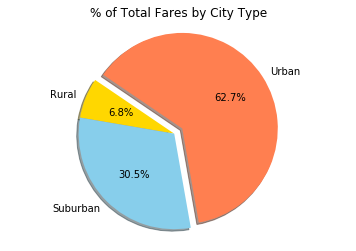

In [5]:
# Calculate Type Percents
#get total fare by summing fare from previous group objects
urbanTotalFare = pd.DataFrame(urbanGroup["fare"].sum())
suburbanTotalFare = pd.DataFrame(suburbanGroup["fare"].sum())
ruralTotalFare = pd.DataFrame(ruralGroup["fare"].sum())

#get fare by type and Total fare values
urbanTotalFare = urbanTotalFare["fare"].sum()
suburbanTotalFare = suburbanTotalFare["fare"].sum()
ruralTotalFare = ruralTotalFare["fare"].sum()
totalFare = urbanTotalFare + suburbanTotalFare + ruralTotalFare

# Build Pie Chart
pieLabels = ["Urban","Rural","Suburban"]
pieColors = ["Coral","gold","skyblue"]
pieces = [urbanTotalFare/totalFare,ruralTotalFare/totalFare,suburbanTotalFare/totalFare]
explode = [0.1,0,0]
plt.pie(pieces,explode=explode,colors = pieColors, labels = pieLabels,autopct="%1.1f%%",shadow=True,startangle=280)
plt.title("% of Total Fares by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("Fare by City Pie.png")

In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

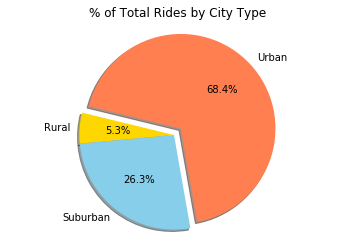

In [7]:
# Calculate Ride Percents
urbanTotalRides = urbanCount.sum()
suburbanTotalRides = suburbanCount.sum()
ruralTotalRides = ruralCount.sum()
totalRides = urbanTotalRides + suburbanTotalRides + ruralTotalRides

# Build Pie Chart
pieLabels = ["Urban","Rural","Suburban"]
pieColors = ["Coral","gold","skyblue"]
pieces = [urbanTotalRides/totalRides,ruralTotalRides/totalRides,suburbanTotalRides/totalRides]
explode = [0.1,0,0]
plt.pie(pieces,explode=explode,colors = pieColors, labels = pieLabels,autopct="%1.1f%%",shadow=True,startangle=280)
plt.title("% of Total Rides by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("Ride by City Pie.png")

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

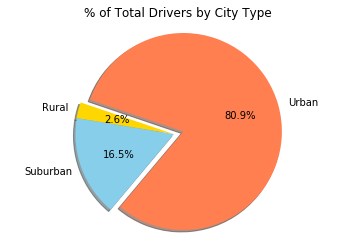

In [10]:
# Calculate Driver Percents
urbanTotalDrivers = urbanDriver.sum()
suburbanTotalDrivers = suburbanDriver.sum()
ruralTotalDrivers = ruralDriver.sum()
totalDrivers = urbanTotalDrivers+suburbanTotalDrivers + ruralTotalDrivers
totalDrivers
# Build Pie Charts
pieLabels = ["Urban","Rural","Suburban"]
pieColors = ["Coral","gold","skyblue"]
pieces = [urbanTotalDrivers/totalDrivers,ruralTotalDrivers/totalDrivers,suburbanTotalDrivers/totalDrivers]
explode = [0.1,0,0]
plt.pie(pieces,explode=explode,colors = pieColors, labels = pieLabels,autopct="%1.1f%%",shadow=True,startangle=230)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")

# Save Figure
plt.savefig("Ride by City Pie.png")

In [29]:
# Show Figure
plt.show()